<a href="https://colab.research.google.com/github/MSimonFRA-UAS/LfDFra-UAS/blob/main/Hilbert_matrix_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
N = 30
K_max = 10**3
sigma = 10**-3
M = 1

In [10]:
def HilbertMatrix(N):
    id_i = np.array([range(N),]*N, dtype = float).transpose()+1
    id_j = np.array([range(N),]*N, dtype = float)+1
    A = np.divide(float(1),id_i+id_j-1)
    return A

In [11]:
def inverseSvd(U,w,V,b,K_max,A):
    w_inv = np.divide(1,w)
    w_inv[np.divide(w[1],w) > K_max] = 0
    S_inv = np.diag(w_inv)
    x_estim = np.matmul(np.transpose(V), np.matmul(S_inv, np.matmul(np.transpose(U), b)))
    x_invEst = np.matmul(np.linalg.inv(A), b)
    return [x_estim,x_invEst]

In [13]:
HM = HilbertMatrix(N)
[U,w,V] = np.linalg.svd(HM)
K = np.amax(w)/np.amin(w)
print("Condition number is " + str(K))

Condition number is 1.4280151402267154e+16


Text(0, 0.5, 'component index')

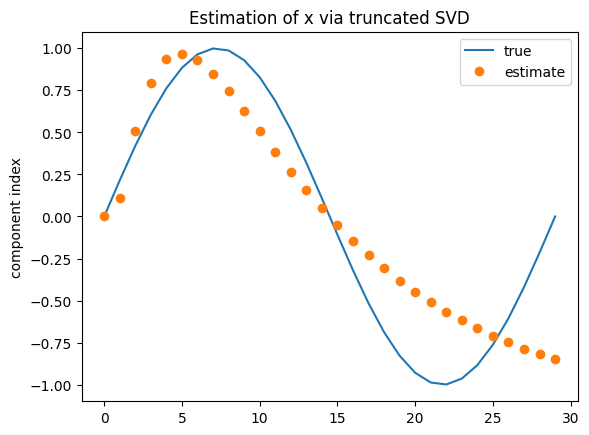

In [16]:
x = np.array([np.sin(2*np.pi*(N_i)/(N-1)) for N_i in range(N)])
b_true = np.matmul(HM, x)
x_est = np.empty([M,N])
x_estInv = np.empty([M,N])

for im in range(M):
    b = b_true + sigma*np.random.randn(*np.shape(b_true))
    (x_est[im,],x_estInv[im,]) = inverseSvd(U,w,V,b,K_max,HM)


fig_traj = plt.figure()
plt.plot(range(N),x, label="true")
plt.plot(range(N),x_est.transpose(),'o', label="estimate" )
plt.title('Estimation of x via truncated SVD')
plt.legend()
plt.ylabel('x')
plt.ylabel('component index')